In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

# Feature Engineering

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [4]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [5]:
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [6]:
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [8]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [10]:
def get_title(data):
    data['Title'] = [data['Name'][i].split(',')[1].split('.')[0] for i in range(len(data['Name']))]

In [11]:
get_title(train_df)

In [12]:
get_title(test_df)

In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [14]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


In [15]:
train_df['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Capt              1
 the Countess      1
 Mme               1
 Jonkheer          1
 Sir               1
 Don               1
 Ms                1
 Lady              1
Name: Title, dtype: int64

In [16]:
test_df['Title'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Rev         2
 Col         2
 Dr          1
 Ms          1
 Dona        1
Name: Title, dtype: int64

In [17]:
dicto = {' Mr':'Mr', ' Miss':'Miss', ' Mrs':'Mrs', ' Master':'Master',' Dr':'Master', ' Rev':'Master', ' Col':'Master', ' Mlle':'Miss', ' Major':'Master', ' the Countess':'Mrs', ' Don':'Master', ' Jonkheer':'Master', ' Capt':'Mr', ' Ms':'Miss', ' Mme':'Mrs', ' Sir':'Master', ' Lady':'Miss', 'Dona':'Miss'} 

In [18]:
train_df['Title'] = train_df['Title'].map(dicto)

In [19]:
test_df['Title'] = test_df['Title'].map(dicto)

In [20]:
train_df['Title'].value_counts()

Mr        518
Miss      186
Mrs       127
Master     60
Name: Title, dtype: int64

In [21]:
test_df['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     26
Name: Title, dtype: int64

In [22]:
test_df['Title'].fillna(test_df['Title'].mode()[0], inplace=True)

In [23]:
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [24]:
sex = {'male':0, 'female':1}
embarked = {'S':0, 'C':1, 'Q':2}
title = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3}

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [26]:
train_df['Sex'] = train_df['Sex'].map(sex)
test_df['Sex'] = test_df['Sex'].map(sex)

train_df['Embarked'] = train_df['Embarked'].map(embarked)
test_df['Embarked'] = test_df['Embarked'].map(embarked)

train_df['Title'] = train_df['Title'].map(title)
test_df['Title'] = test_df['Title'].map(title)

In [27]:
train_df['Sex'] = train_df['Sex'].astype('category')
test_df['Sex'] = test_df['Sex'].astype('category')


train_df['Embarked'] = train_df['Embarked'].astype('category')
test_df['Embarked'] = test_df['Embarked'].astype('category')

train_df['Title'] = train_df['Title'].astype('category')
test_df['Title'] = test_df['Title'].astype('category')

train_df['Survived'] = train_df['Survived'].astype('category')

train_df['Pclass'] = train_df['Pclass'].astype('category')
test_df['Pclass'] = test_df['Pclass'].astype('category')

In [28]:
train_df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
Title          category
dtype: object

In [29]:
test_df.dtypes

PassengerId       int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
Title          category
dtype: object

In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0


In [31]:
train_df.fillna(np.nan, inplace=True)

In [32]:
test_df.fillna(np.nan, inplace=True)

In [33]:
series1 = train_df[train_df.loc[:, 'Sex'] == 0]['Age'].fillna(train_df.groupby(['Sex']).mean()['Age'][0])
series2 = train_df[train_df.loc[:, 'Sex'] == 1]['Age'].fillna(train_df.groupby(['Sex']).mean()['Age'][1])

new_series = pd.concat([series1, series2]).sort_index()

In [34]:
train_df['Age'] = new_series

In [35]:
series3 = test_df[test_df.loc[:, 'Sex'] == 0]['Age'].fillna(test_df.groupby(['Sex']).mean()['Age'][0])
series4 = test_df[test_df.loc[:, 'Sex'] == 1]['Age'].fillna(test_df.groupby(['Sex']).mean()['Age'][1])

new_series2 = pd.concat([series3, series4]).sort_index()

In [36]:
test_df['Age'] = new_series2

In [37]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [38]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [39]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0,1


# Random Forest Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [51]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch'], axis=1), train_df['Survived'], test_size=0.2, random_state=42)

## The simplest model

In [116]:
rf = RandomForestClassifier(random_state=42)

In [117]:
rf.fit(X_train, y_train)

C:\Users\ivan_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [118]:
y_pred = rf.predict(X_test)

In [119]:
random_forest_default_acc = accuracy_score(y_test, y_pred)
random_forest_default_acc

0.8156424581005587

In [120]:
print(confusion_matrix(y_test, y_pred))

[[91 14]
 [19 55]]


In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

   micro avg       0.82      0.82      0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [58]:
auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

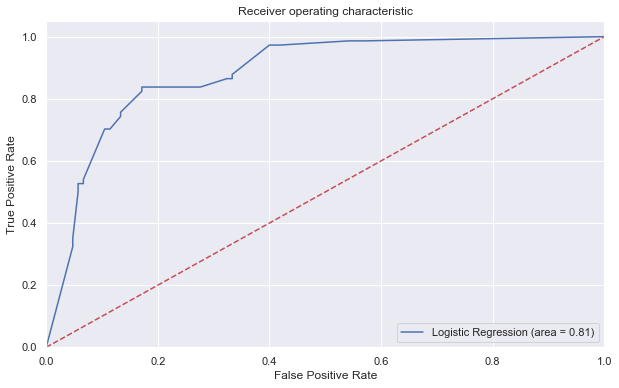

In [59]:
sns.set()
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

## Tuning the hyperparameters

In [67]:
rf_tun = RandomForestClassifier(random_state=42)

In [68]:
param_grid = { 
    'n_estimators': [10, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [69]:
rf_cv = GridSearchCV(rf_tun, param_grid=param_grid, cv=5)

In [70]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 200, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [72]:
rf_best = rf_cv.best_estimator_

In [73]:
y_pred = rf_best.predict(X_test)

In [83]:
rf_boosted_acc_score = accuracy_score(y_test, y_pred)
rf_boosted_acc_score

0.8324022346368715

In [75]:
print(confusion_matrix(y_test, y_pred))

[[93 12]
 [18 56]]


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

   micro avg       0.83      0.83      0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [86]:
rf_boosted_auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, rf_best.predict_proba(X_test)[:, 1])

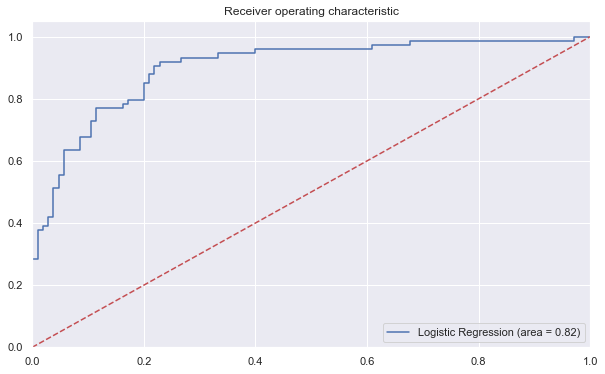

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_boosted_auc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# Prediction on the Test Set using Random Forest

In [77]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0,2,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,2,0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0,2,3


In [78]:
predict = rf_best.predict(test_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch'], axis=1))

In [79]:
d = {'PassengerId':test_df['PassengerId'], 'Survived':predict}

In [80]:
titanic_submission = pd.DataFrame(d)

In [82]:
#titanic_submission.to_csv('titanic_submission.csv', index=False)

# Gradient Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
gb = GradientBoostingClassifier()

In [92]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [93]:
y_pred = gb.predict(X_test)

In [94]:
grad_class_acc = accuracy_score(y_test, y_pred)
grad_class_acc

0.8100558659217877

In [95]:
print(confusion_matrix(y_test, y_pred))

[[90 15]
 [19 55]]


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [416]:
predict = gb.predict(test_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch'], axis=1))

In [417]:
d = {'PassengerId':test_df['PassengerId'], 'Survived':predict}

In [418]:
titanic_gradient_boosting_simple = pd.DataFrame(d)

In [420]:
titanic_gradient_boosting_simple.to_csv('titanic_gradient_boosting_simples.csv', index=False)

## Tuning the hyperparameters

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
param_grid = {'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01], 'n_estimators':[1, 2, 4, 8, 16, 32, 64, 100, 200], 'max_depth':np.linspace(1, 32, 32, endpoint=True), 'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True), 'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True), 'max_features':list(range(1,X_train.shape[1]+1))}

In [98]:
gb_tun = GradientBoostingClassifier()

In [101]:
gb_cv = RandomizedSearchCV(gb_tun, param_distributions=param_grid, cv=5, n_jobs=-1)

In [102]:
gb_cv.fit(X_train, y_train)

C:\Users\ivan_\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01], 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200], 'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]), 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'ma

In [103]:
gb_best = gb_cv.best_estimator_

In [104]:
y_pred = gb_best.predict(X_test)

In [106]:
grad_class_boosted_acc = accuracy_score(y_test, y_pred)
grad_class_boosted_acc

0.8044692737430168

In [107]:
roc_auc_score(y_test, y_pred)

0.7974259974259975

In [108]:
print(confusion_matrix(y_test, y_pred))

[[88 17]
 [18 56]]


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [398]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0,2,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,2,0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0,2,3


In [401]:
predict = gb_best.predict(test_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch'], axis=1))

In [403]:
d = {'PassengerId':test_df['PassengerId'], 'Survived':predict}

In [405]:
titanic_gradient_boosting_submission = pd.DataFrame(d)

# Accuracy scores of the models

In [122]:
dic = {'Random Forest Default':random_forest_default_acc, 'Random Forest Tuned':rf_boosted_acc_score, 'Gradient Boosting Default':grad_class_acc, 'Gradient Boosting Tuned':grad_class_boosted_acc}

In [129]:
dic

{'Random Forest Default': 0.8156424581005587,
 'Random Forest Tuned': 0.8324022346368715,
 'Gradient Boosting Default': 0.8100558659217877,
 'Gradient Boosting Tuned': 0.8044692737430168}